In [29]:
import numpy as np
from matplotlib import pyplot as plt
import astropy
import scipy

In [30]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1

In [74]:
sun_data_1hr, sun_times_1hr = np.load('data/1hr_Sun_data.npy')
sun_data_1hr = sun_data_1hr[50:]
sun_times_1hr = sun_times_1hr[50:]

In [32]:
crab_data, times = np.load('data/final_data.npy')

In [33]:
crab_data.shape

(190401,)

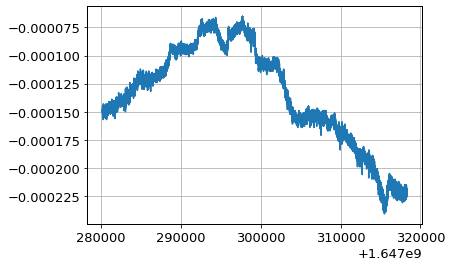

In [34]:
plt.plot(times, crab_data)

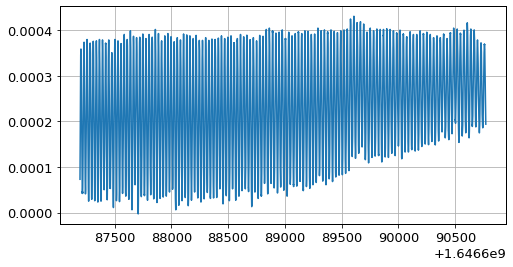

In [35]:
plt.figure(figsize=(8,4))
plt.plot(sun_times, sun_data)

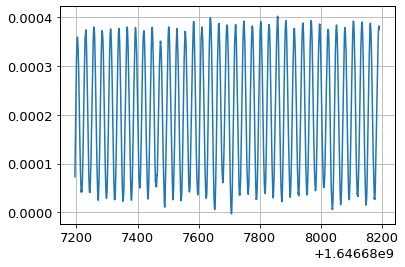

In [36]:
plt.plot(sun_times[:5000], sun_data[:5000])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


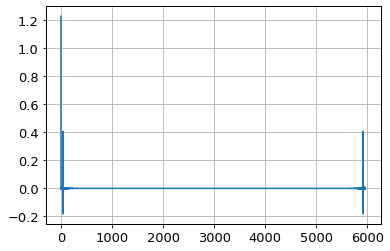

In [37]:
n = len(sun_data)
beginning, beginning_time = sun_data[:n//3], sun_times[:n//3]
middle, middle_time = sun_data[n//3:2*n//3], sun_times[n//3:2*n//3]
end, end_time = sun_data[2*n//3:], sun_times[2*n//3:]
beginning_fft = np.fft.fft(beginning)
plt.plot(beginning_fft)

In [85]:
def pow_fft(arr):
    return np.fft.fftshift(np.abs(np.fft.fft(arr))**2)

def freq(arr, dt):
    return np.fft.fftshift(np.fft.fftfreq(len(arr), dt))

In [86]:
def split_data(data, time, num_splits):
    n = len(data)
    split_size = n // num_splits
    data_splits = []
    freq_splits = []
    for i in range(num_splits):
        data_frac = data[i*split_size:(i+1)*split_size]
        time_frac = time[i*split_size:(i+1)*split_size]
        dt = np.mean(np.diff(time_frac))
        frequency = freq(time_frac, dt)
        pow_frac = pow_fft(data_frac)
        
        data_splits.append(pow_frac)
        freq_splits.append(frequency)
        
    return data_splits, freq_splits

Text(0.5, 1.0, 'Sun 3 Split Power Spectra')

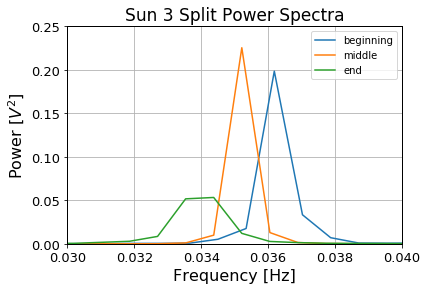

In [40]:
# dt = np.mean(np.diff(sun_times))
# beginning_freq = freq(beginning_time, dt)
# middle_freq = freq(middle_time, dt)
# end_freq = freq(end_time, dt)

# pow_beginning = pow_fft(beginning)
# pow_middle = pow_fft(middle) 
# pow_end = pow_fft(end) 
sun_data_split, sun_time_split = split_data(sun_data, sun_times, 3)
pow_beginning, pow_middle, pow_end = sun_data_split
beginning_freq, middle_freq, end_freq = sun_time_split

plt.plot(beginning_freq, pow_beginning, label="beginning")
plt.plot(middle_freq, pow_middle, label='middle')
plt.plot(end_freq, pow_end, label='end')
plt.legend()
plt.xlim(0.03,0.04)
# plt.xlim(0.0,0.1)
# plt.yscale('log')
plt.ylim(0,0.25)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power [$V^2$]')
plt.title('Sun 3 Split Power Spectra')

# should be power squared arbitrary units

In [41]:
sun_times[1] - sun_times[0]

0.20022296905517578

In [42]:
crab_12_data, crab_12_time = np.load('data/final_data.npy')

Text(0, 0.5, 'Power [Arbitrary]')

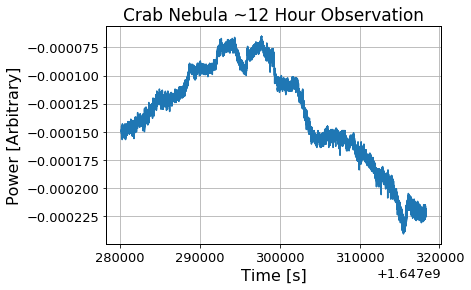

In [43]:
plt.plot(crab_12_time, crab_12_data)
plt.title('Crab Nebula ~12 Hour Observation')
plt.xlabel('Time [s]')
plt.ylabel('Power [Arbitrary]')

Text(0.5, 1.0, 'Crab Nebula 5 Split Power Spectra')

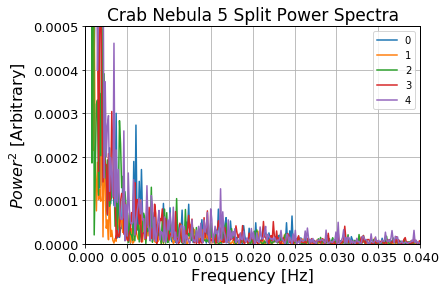

In [44]:
crab_splits, crab_freqs = split_data(crab_12_data, crab_12_time, 5)
for i in range(len(crab_splits)):
#     crab_splits[i][len(crab_splits[i])//2-1000:len(crab_splits[i])//2+1000] = 0
    plt.plot(crab_freqs[i], crab_splits[i], label=str(i))
plt.legend()
plt.xlim(0,0.04)
plt.ylim(0,.0005)
# plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$Power^2$ [Arbitrary]')
plt.title('Crab Nebula 5 Split Power Spectra')

In [45]:
# should set dt = 1s instead of 0.1s


In [97]:
moon_data, moon_times = np.load('data/moon.npy')

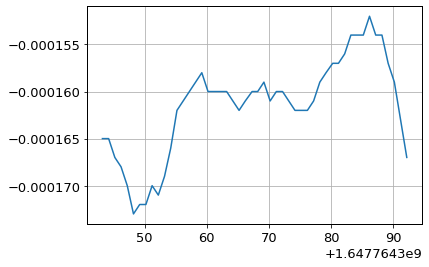

In [119]:
plt.plot(moon_times[:50], moon_data[:50])

Text(0.5, 1.0, 'Split Power Spectra')

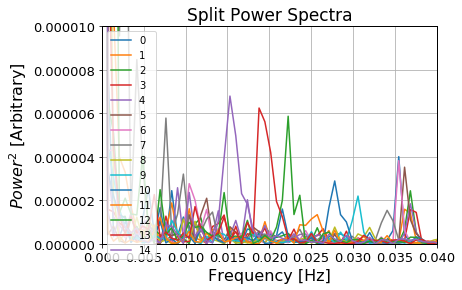

In [120]:
moon_splits, moon_freqs = split_data(moon_data, moon_times, 15)
for i in range(len(moon_splits)):
#     crab_splits[i][len(crab_splits[i])//2-1000:len(crab_splits[i])//2+1000] = 0
    plt.plot(moon_freqs[i], moon_splits[i], label=str(i))
plt.legend(loc='upper left')
plt.xlim(0,0.04)
plt.ylim(0,.00001)
# plt.yscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$Power^2$ [Arbitrary]')
plt.title('Split Power Spectra')

In [237]:
sun_data, sun_times = np.load('data/sun_6hr.npy')

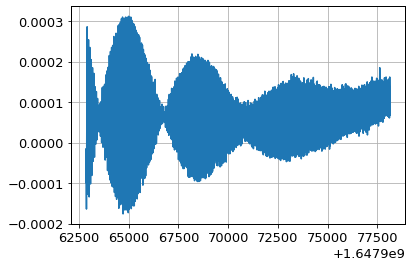

In [238]:
plt.plot(sun_times[:17000], sun_data[:17000])
sun_times, sun_data = sun_times[:17000], sun_data[:17000]
# sun_data[:2000]

In [253]:
import astropy.constants as con
import astropy.units as u
import scipy.special
import scipy.optimize.curve_fit
import ugra

ModuleNotFoundError: No module named 'scipy.optimize.curve_fit'

In [260]:
x = np.linspace(0.0000001,11,10000)
j1 = scipy.special.j1(x)

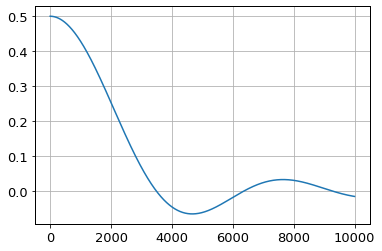

In [261]:
plt.plot(j1/x)

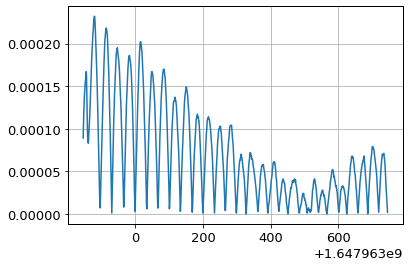

In [243]:
centered_abs_sun_data = np.abs(sun_data - np.median(sun_data))
plt.plot(sun_times[:1000], centered_abs_sun_data[:1000])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.1, 0.1)

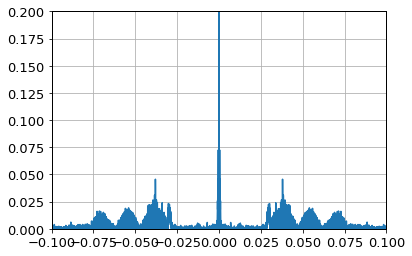

In [270]:
fft = np.fft.fftshift(np.fft.fft(centered_abs_sun_data))
freqs = freq(sun_times, np.mean(np.diff(sun_times)))
plt.plot(freqs, fft)
plt.ylim(0,.2)
plt.xlim(-0.1, 0.1)
# plt.vlines(0.2, 0, .2)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.025, 0.025)

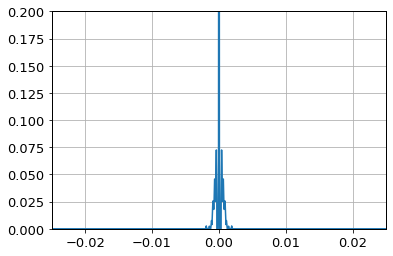

In [271]:
fft[np.where(freqs > 0.002)] = 0
fft[np.where(freqs < -0.002)] = 0
plt.plot(freqs, fft)
plt.ylim(0,0.2)
plt.xlim(-0.025, 0.025)

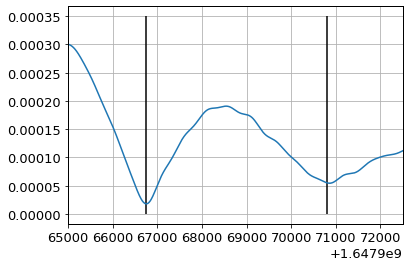

In [272]:
filtered_sun_data = np.fft.ifft(fft)
centered_abs_filtered = np.abs(filtered_sun_data - np.median(filtered_sun_data))
plt.plot(sun_times[:20000], 2*centered_abs_filtered[:20000])
# plt.plot(sun_times[:10000], (sun_data - np.median(sun_data))[:10000])
# np.where(sun_times < )
plt.xlim(65000+1.6479e9, 72500+1.6479e9)
plt.vlines(66750+1.6479e9, 0,0.00035)
plt.vlines(70800+1.6479e9, 0, 0.00035)


(1647965000.0, 1647972500.0)

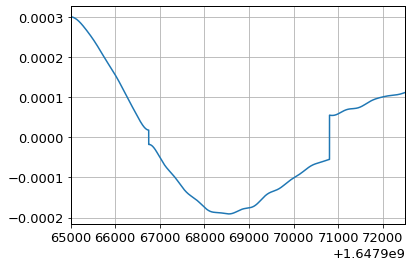

In [273]:
centered_abs_filtered[np.where((sun_times < 70800+1.6479e9) & (sun_times > 66750+1.6479e9))] *= -1
plt.plot(sun_times[:20000], 2*centered_abs_filtered[:20000])
plt.xlim(65000+1.6479e9, 72500+1.6479e9)

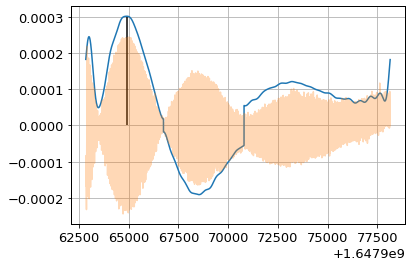

In [274]:
plt.plot(sun_times[:20000], 2*centered_abs_filtered[:20000])
plt.plot(sun_times[:20000], (sun_data - np.median(sun_data))[:20000], alpha=0.3)
plt.vlines(64900+1.6479e9, 0, 0.0003)

In [252]:
def bessel(ha, thetaR, A):
    delta = 0
    d = 14.7106 #m
    u = d * np.cos(delta) * np.cos(ha)
    x = 2 * np.pi * thetaR * u
    return A * j1(x) / x

In [ ]:
jds=ugradio.timing.julian_date(sun_data[0])
alpha,delta =ugradio.coord.sunpos(jds[0])
delta=(np.pi/180)*delta
LSTs = ugradio.timing.lst(jds,lon=long)
hs = LSTs - alpha*(np.pi/180)
ha = np.linspace(-74.18,(-74.18+15*6),len(jds))*(np.pi/180)

pars, cov = scipy.optimize.curve_fit(bessel, ha, )